# <span style="color:green"> Numerical Simulation Laboratory (NSL) </span>
## <span style="color:blue">  Numerical exercises 2</span>


### Exercise 02.1
- Compute the following 1D integral via Monte Carlo 
$$I = \int_0^1 \frac{\pi}{2}\cos(\pi x/2) dx = 1$$

1. sampling a uniform distribution in $[0,1]$
2. using importance sampling (i.e. sampling a non-uniform probability in $[0,1]$)

<span style="color:red">Show a picture of both your estimations of $I$</span> and their uncertainties with a large number of *throws* $M$ (e.g. $M\ge 10^4$) as a function of the number of blocks, $N$</font>.

In [33]:
# First Point
import matplotlib.pyplot as plt
import numpy as np
from seaborn import set_style
from scipy.integrate import quad

set_style("whitegrid")

Using Antithetic on the integrand we can improve the variance of the estimation, this can be done because in this interval $\cos(x)$ is quasi linear.
In this way the integrand also became symmetric in $x = 1/2$, in this case we can use importance sampling using a taylor expansion of the integrand.

So using a new integrand:
$$
    h(x) = \frac{1}{2} \left(g(x) + g(1-x)\right) = \frac{\pi}{2\sqrt{2}} \cos{\left(\frac{\pi}{2}\left(x - \frac{1}{2}\right)\right)}
$$

The taylor expansion gives:
$$
    p(x) = \frac{\pi}{2\sqrt{2}}\left( 1 - \frac{\pi^2}{8}\left(x - \frac{1}{2}\right)^2\right)
$$

Which is locally invertible, but cannot be inverted globally, but we have accept reject, so it is a non problem.

Normalizing $p(x)$ produces:
$$
    p_N(x) = \frac{(1 - \frac{\pi^2}{8}\left(x - \frac{1}{2}\right)^2)}{1 - \frac{\pi^2}{96}}
$$

At this point the integrand becames, sampled using $p_N(x)$:

$$
    \frac{h(x)}{p_N(x)} = \frac{\left(1 - \frac{\pi^2}{96}\right)\frac{\pi}{2\sqrt{2}} \cos{\left(\frac{\pi}{2}\left(x - \frac{1}{2}\right)\right)}}{(1 - \frac{\pi^2}{8}\left(x - \frac{1}{2}\right)^2)}
$$


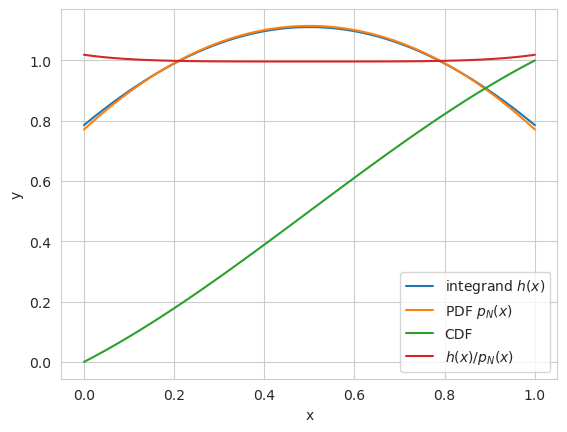

In [34]:
PI_2 = np.pi / 2.0


def integrand(x):
    return PI_2 * np.cos(PI_2 * x)


def antithetic_integrand(x):
    return (integrand(x) + integrand(1 - x)) / 2.0


def probability(x):
    # return (4. / np.pi) * (np.pi/ 2. - np.pi/2 * x)
    # return np.pi/2 * (1 - (np.pi * x / 2 ) ** 2 / 2.)
    return (1 - (PI_2) ** 2 / 2 * (x - 0.5) ** 2) / (1 - PI_2**2 / 24.0)


def cumulative(x):
    res = []
    for i in x:
        res.append(quad(probability, 0.0, i)[0])
    return np.array(res)


x = np.linspace(0.0, 1.0, num=100)

plt.plot(x, antithetic_integrand(x), label="integrand $h(x)$")
plt.plot(x, probability(x), label="PDF $p_N(x)$")
plt.plot(x, cumulative(x), label="CDF")
plt.plot(x, antithetic_integrand(x) / probability(x), label="$h(x) / p_N(x)$")
plt.xlabel("x")
plt.ylabel("y")
plt.legend();

The idea behind importance sampling is to obtain an integrand function as smooth and constant as possible and to offload all the features of the original integrand to the sampler.
Using antithetic technique and a good sampling function we get an integrand function that is practically constant with a unitary value.

An improvement on the method could be to use an improved accept reject method, to increase the efficency of the extraction, this doesn't improve the final result, improves only the mean time complexity. 


Numero di Blocchi : 1000
Lanci per Blocco : 1000


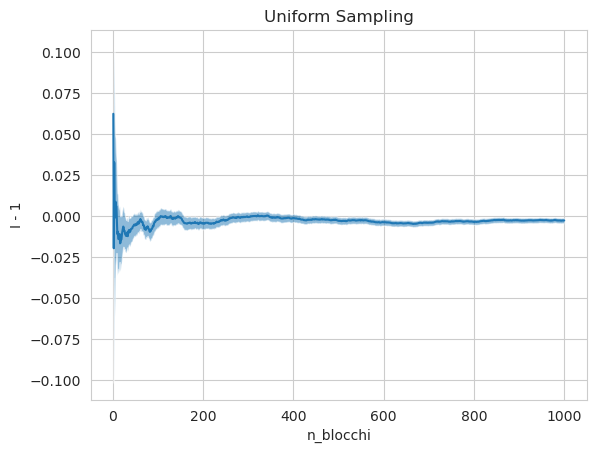

In [35]:
x_label = "# Blocchi"
y_label = r"$ I - 1$"

data_unif = np.loadtxt("eser_2/2_1/uniform.csv", delimiter=",")
x = np.arange(1, 1 + data_unif.shape[0])
plt.plot(x, data_unif[:, 0] - 1)
plt.fill_between(
    x,
    data_unif[:, 0] - 1 - data_unif[:, 1],
    data_unif[:, 0] - 1 + data_unif[:, 1],
    alpha=0.5,
)
plt.xlabel("n_blocchi")
plt.ylabel("I - 1")
plt.title("Uniform Sampling")
print(f"Numero di Blocchi : {x.size}")
print("Lanci per Blocco : 1000")

The precision obtained at the end of the cycle using a uniform sampling is of $10^{-3}$

Numero di Blocchi : 1000
Lanci per Blocco : 1000


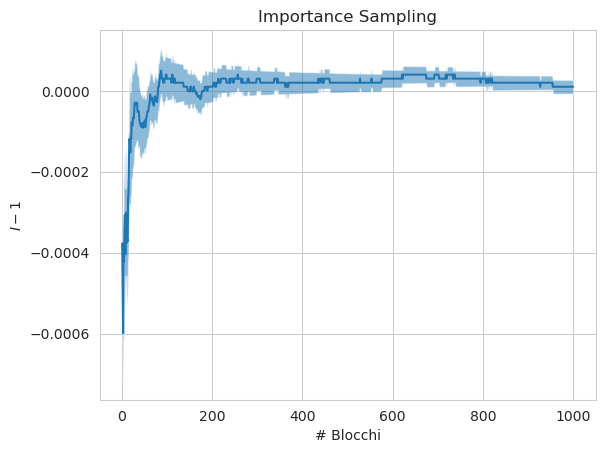

In [36]:
# second point
data_precise = np.loadtxt("eser_2/2_1/precise.csv", delimiter=",")
x = np.arange(1, 1 + data_unif.shape[0])
plt.plot(x, data_precise[:, 0] - 1)
plt.fill_between(
    x,
    data_precise[:, 0] - 1 - data_precise[:, 1],
    data_precise[:, 0] - 1 + data_precise[:, 1],
    alpha=0.5,
)
# plt.errorbar(x, data_precise[:, 0] - 1, data_precise[:, 1])
plt.xlabel(x_label)
plt.ylabel(y_label)
plt.title("Importance Sampling")
print(f"Numero di Blocchi : {x.size}")
print("Lanci per Blocco : 1000");

Using importance sampling with a few blocks we get a precision comparable to the end result of uniform sampling, also in the end we get a precision of $10^{-5}-10^{-6}$, three orders of magnitude greater than the previous case.

### Exercise 02.2
- <span style="color:red">3D Random Walks (RW) on a cubic lattice and in the continuum:</span> Repeat many times (e.g. say $10^4$) the simulation of a random walk in 3D always starting at the origin

1. on a cubic lattice with lattice constant $a=1$; at each discrete time the walker makes a forward or backward step of length equal to $a$ in one of the 3 principal directions of the lattice: $x$, $y$ or $z$
2. in the continuum; at each discrete time the walker makes a step of length equal to $a(=1)$ along a **random direction** obtained by sampling **uniformly** the solid angle: $\theta \in [0,\pi]$ and $\phi \in [0,2\pi]$

<span style="color:red">Show a picture of $\sqrt{\langle |\vec{r}_N|^2 \rangle_{RW}}$ for both RWs</span>, with their statistical uncertainties, as function of the step $i\in [0,10^2]$.

Suggestion: divide your $M$ throws into a reasonable number of blocks, compute $\sqrt{\langle |\vec{r}_N|^2 \rangle_{RW}}$ as function of the step $i\in [0,10^2]$ in each block and use these values (for fixed $i$) to obtain the average value and its statistical uncertainty.

Note that you could try to fit both results with a function like $f(N)=k\sqrt{N}$. Do your results indicate a diffusive behavior?

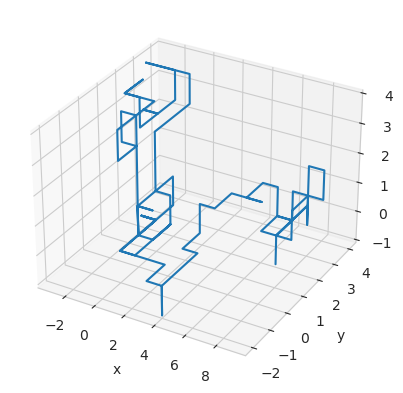

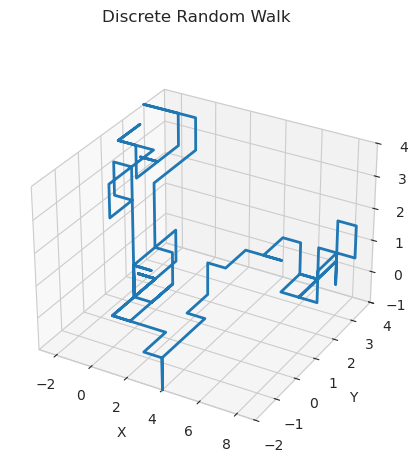

In [37]:
from mpl_toolkits.mplot3d import axes3d
from matplotlib.animation import FuncAnimation


ax: axes3d.Axes3D = plt.figure().add_subplot(projection="3d")

data_lattice = np.loadtxt(
    "eser_2/2_2/random_walk_lattice.csv", delimiter=",", skiprows=1
)

ax.plot(data_lattice[:, 0], data_lattice[:, 1], data_lattice[:, 2])
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")

# Create a figure and a 3D axis
fig = plt.figure(figsize=(5,5))
ax: axes3d.Axes3D = fig.add_subplot(projection="3d")
fig.suptitle("Discrete Random Walk")

# Initialize the plot
(line,) = ax.plot([], [], [], lw=2)

# Set axis labels
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")

# Set axis limits
ax.set_xlim(np.min(data_lattice[:, 0]), np.max(data_lattice[:, 0]))
ax.set_ylim(np.min(data_lattice[:, 1]), np.max(data_lattice[:, 1]))
ax.set_zlim(np.min(data_lattice[:, 2]), np.max(data_lattice[:, 2]))


# Initialization function
def init():
    line.set_data([], [])
    line.set_3d_properties([])
    return (line,)


# Animation function
def animate(i):
    line.set_data(data_lattice[:i, 0], data_lattice[:i, 1])
    line.set_3d_properties(data_lattice[:i, 2])
    return (line,)


# Create the animation
ani = FuncAnimation(
    fig, animate, init_func=init, frames=len(data_lattice), interval=50, blit=True
)
ani.save("eser_2/random_walk_lattice.gif",writer='pillow', fps=30);

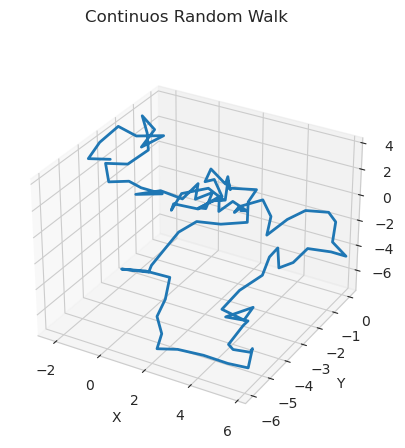

In [38]:

# Load the data
data_continuos = np.loadtxt(
    "eser_2/2_2/random_walk_continuos.csv", delimiter=",", skiprows=1
)

# Create a figure and a 3D axis
fig = plt.figure()
ax: axes3d.Axes3D = fig.add_subplot(projection="3d")
fig.suptitle("Continuos Random Walk")

# Initialize the plot
(line,) = ax.plot([], [], [], lw=2)

# Set axis labels
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")

# Set axis limits
ax.set_xlim(np.min(data_continuos[:, 0]), np.max(data_continuos[:, 0]))
ax.set_ylim(np.min(data_continuos[:, 1]), np.max(data_continuos[:, 1]))
ax.set_zlim(np.min(data_continuos[:, 2]), np.max(data_continuos[:, 2]))


# Initialization function
def init():
    line.set_data([], [])
    line.set_3d_properties([])
    return (line,)


# Animation function
def animate(i):
    line.set_data(data_continuos[:i, 0], data_continuos[:i, 1])
    line.set_3d_properties(data_continuos[:i, 2])
    return (line,)


# Create the animation
ani = FuncAnimation(
    fig, animate, init_func=init, frames=len(data_continuos), interval=50, blit=True
)
ani.save("eser_2/random_walk_continuos.gif", writer='pillow', fps=30);

![animation](eser_2/random_walk_continuos.gif)

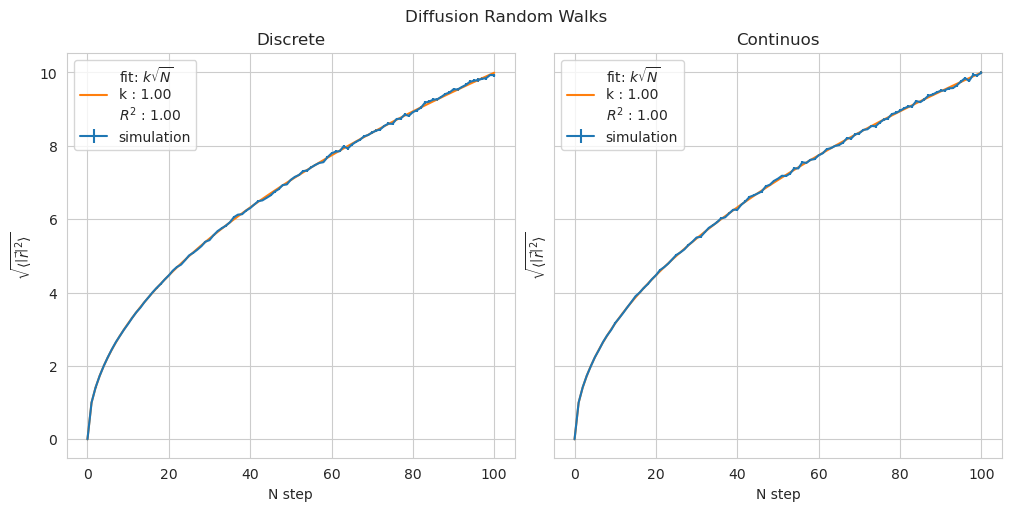

In [42]:
from scipy.optimize import curve_fit
from sklearn.metrics import r2_score


def f(x, k):
    return k * np.sqrt(x)


fig, axs = plt.subplots(1, 2, sharey=True, figsize=(10, 5), layout="constrained")
fig.suptitle("Diffusion Random Walks")
discrete_step = np.loadtxt("eser_2/2_2/result_lattice.csv", delimiter=",")

x = np.arange(discrete_step.shape[0])
popt, pcov = curve_fit(f, x, discrete_step[:, 0], 1.0e-1)

axs[0].errorbar(x, discrete_step[:, 0], discrete_step[:, 1], label="simulation")
axs[0].plot(
    x,
    f(x, *popt),
    label=r"fit: $k\sqrt{N}$"
    + f"\nk : {popt[0]:.2f}\n"
    + r"$R^2$ : "
    + f"{r2_score(discrete_step[:,0], f(x, *popt)):.2f}",
)
axs[0].legend()


axs[0].set_xlabel("N step")
axs[0].set_ylabel(r"$\sqrt{\langle\left| \vec{r} \right|^2 \rangle}$")
axs[0].set_title("Discrete")
continuos_step = np.loadtxt("eser_2/2_2/result_continuos.csv", delimiter=",")

popt, pcov = curve_fit(f, x, continuos_step[:, 0], 1.0e-1)

axs[1].errorbar(
    np.arange(continuos_step.shape[0]), continuos_step[:, 0], continuos_step[:, 1], label='simulation'
)
axs[1].plot(
    x,
    f(x, *popt),
    label=r"fit: $k\sqrt{N}$"
    + f"\nk : {popt[0]:.2f}\n"
    + r"$R^2$ : "
    + f"{r2_score(discrete_step[:,0], f(x, *popt)):.2f}",
)
axs[1].legend()

axs[1].set_xlabel("N step")
axs[1].set_ylabel(r"$\sqrt{\langle\left| \vec{r} \right|^2 \rangle}$")
axs[1].set_title("Continuos");

# print(f"R2 Score is : {r2_score(discrete_step[:,0], f(x, *popt))}")

From the graphs we can see that both random walkers present the same diffusive behaviour.